# TM06 embedding(chinese)

# Loading data

In [1]:
import pandas as pd
df = pd.read_csv('data/sentiment.csv')
df.head(5)

,tag,text
0,P,店家很給力，快遞也是相當快，第三次光顧啦
1,N,這樣的配置用Vista系統還是有點卡。 指紋收集器。 沒送原裝滑鼠還需要自己買，不太好。
2,P,不錯，在同等檔次酒店中應該是值得推薦的！
3,N,哎！ 不會是蒙牛乾的吧 嚴懲真凶！
4,N,空尤其是三立電視臺女主播做的序尤其無趣像是硬湊那麼多字


In [2]:
print(df.shape)
print(df['tag'].value_counts())

(6388, 2)
N    3347
P    3041
Name: tag, dtype: int64


# Tokenization

In [3]:
import jieba
df['token_text'] = df['text'].apply(lambda x:list(jieba.cut(x)))
df.head(20)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/0p/7xy1_dzx0_s5rnf06c0b316w0000gn/T/jieba.cache
Loading model cost 0.814 seconds.
Prefix dict has been built successfully.


,tag,text,token_text
0,P,店家很給力，快遞也是相當快，第三次光顧啦,"[店家, 很, 給力, ，, 快遞, 也, 是, 相當快, ，, 第三次, 光顧, 啦]"
1,N,這樣的配置用Vista系統還是有點卡。 指紋收集器。 沒送原裝滑鼠還需要自己買，不太好。,"[這樣, 的, 配置, 用, Vista, 系統, 還是, 有點, 卡, 。, , 指紋,..."
2,P,不錯，在同等檔次酒店中應該是值得推薦的！,"[不錯, ，, 在, 同等, 檔次, 酒店, 中應, 該, 是, 值得, 推薦, 的, ！]"
3,N,哎！ 不會是蒙牛乾的吧 嚴懲真凶！,"[哎, ！, , 不會, 是, 蒙牛, 乾, 的, 吧, , 嚴懲, 真凶, ！]"
4,N,空尤其是三立電視臺女主播做的序尤其無趣像是硬湊那麼多字,"[空, 尤其, 是, 三立, 電視, 臺, 女主播, 做, 的, 序, 尤其, 無趣, 像是..."
5,N,明明買了6本書，只到了3本，也沒有說是什麼原因，以後怎麼信的過？？？？？？？？？？？,"[明明, 買, 了, 6, 本書, ，, 只到, 了, 3, 本, ，, 也, 沒, 有, ..."
6,P,看了一下感覺還可以,"[看, 了, 一下, 感覺還, 可以]"
7,P,散熱還不錯，玩遊戲cpu溫度和硬碟溫度都在56以下， 速度很好，顯示卡也不錯,"[散熱, 還不錯, ，, 玩遊戲, cpu, 溫度, 和, 硬碟, 溫度, 都, 在, 56..."
8,P,外觀好看，白色的自己貼紙也方便，vista執行起來速度也還不錯.屬於主流配置了。一般用用可以的,"[外觀, 好看, ，, 白色, 的, 自己, 貼紙, 也, 方便, ，, vista, 執行..."
9,N,水超級小 用的時候還要先修理一下花灑 售後還說是水壓問題 說本來標配都是這樣還要自己重新換一個,"[水超級, 小, , 用, 的, 時候, 還要, 先, 修理, 一下, 花灑, , 售後..."


# term frequency

In [4]:
with open("data/stopwords_zh-tw.txt", encoding="utf-8") as fin:
    stopwords = fin.read().split("\n")[1:]
print(stopwords[:100])
print(len(stopwords))

['?', '、', '。', '“', '”', '《', '》', '！', '，', '：', '；', '？', '人民', '末##末', '啊', '阿', '哎', '哎呀', '哎喲', '唉', '我', '我們', '按', '按照', '依照', '吧', '吧噠', '把', '罷了', '被', '本', '本著', '比', '比方', '比如', '鄙人', '彼', '彼此', '邊', '別', '別的', '別說', '並', '並且', '不比', '不成', '不單', '不但', '不獨', '不管', '不光', '不過', '不僅', '不拘', '不論', '不怕', '不然', '不如', '不特', '不惟', '不問', '不只', '朝', '朝著', '趁', '趁著', '乘', '沖', '除', '除此之外', '除非', '除了', '此', '此間', '此外', '從', '從而', '打', '待', '但', '但是', '當', '當著', '到', '得', '的', '的話', '等', '等等', '地', '第', '叮咚', '對', '對於', '多', '多少', '而', '而況', '而且', '而是']
1208


In [5]:
import unicodedata # for removing Chinese puctuation
from collections import Counter

print(unicodedata.category('我').startswith('P'))

word_count = Counter()
for tokens in df['token_text']:
    for tok in tokens:
        try:
            if len(tok) > 1 and not unicodedata.category(tok[0]).startswith('P'):
                word_count[tok] += 1
        except:
            print("%s\tTypeError: category() argument must be a unicode character, not str"%(tok))
for k, v in word_count.most_common(30):
    print(k, '\t', v)

False
蒙牛 	 1556
不錯 	 907
可以 	 470
沒有 	 402
酒店 	 385
房間 	 366
就是 	 359
感覺 	 350
還是 	 340
外觀 	 294
一般 	 284
系統 	 276
價格 	 269
非常 	 268
價效 	 262
螢幕 	 258
喜歡 	 257
方便 	 250
有點 	 247
這個 	 241
什麼 	 236
不是 	 225
比較 	 225
功能 	 222
服務 	 220
一個 	 206
配置 	 203
問題 	 203
不好 	 203
速度 	 195


# Building model

In [13]:
from gensim.models import Word2Vec
model = Word2Vec(df['token_text'], min_count=1, size=100, window=5, sg=0, workers=4)

ImportError: cannot import name 'getargspec_no_self' from 'scipy._lib._util' (/Users/jirlong/opt/anaconda3/lib/python3.7/site-packages/scipy/_lib/_util.py)

# Testing model

## Similarity

In [8]:
#  他 : 工程師 = 她 : ?
print(model.most_similar_cosmul(["女生", "粉紅"], ["男生"], topn=20))
print("-"*40)
#  他 : 醫師 = 她 : ?
print(model.most_similar_cosmul(["她", "醫師"], ["他"], topn=20))

/Users/jirlong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  


KeyError: "word '粉紅' not in vocabulary"

## Visualiation with Dimension reduction
- [Matplotlib顯示中文問題: Win](https://medium.com/marketingdatascience/%E8%A7%A3%E6%B1%BApython-3-matplotlib%E8%88%87seaborn%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E5%95%8F%E9%A1%8C-f7b3773a889b)
- [Using Chinese Characters in Matplotlib](https://hoishing.medium.com/using-chinese-characters-in-matplotlib-5c49dbb6a2f7)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(24, 16)
# 
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = ['Heiti TC']

<Figure size 1728x1152 with 0 Axes>

### Reduced by PCA

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

words = [k for k, v in word_count.most_common(150)]
print(words)
X = []
for word in words:
    X.append(model[word])
points = pca.fit_transform(X)
points[:20]

['蒙牛', '不錯', '可以', '沒有', '酒店', '房間', '就是', '感覺', '還是', '外觀', '一般', '系統', '價格', '非常', '價效', '螢幕', '喜歡', '方便', '有點', '這個', '什麼', '不是', '比較', '功能', '服務', '一個', '配置', '問題', '不好', '速度', '時間', '鍵盤', '支援', '自己', '不過', '知道', '而且', '電池', 'XP', '效果', '質量', '還不錯', '驅動', '不能', '怎麼', '散熱', '記憶體', '抵制', '東西', '伊利', '漂亮', '滿意', '顯示', '牛奶', '早餐', '收到', '使用', '還有', '安裝', '內容', '做工', '效能', '這本書', '便宜', '環境', '很快', '設施', '這樣', '時候', '很多', '聲音', '適合', '發現', '手感', '一點', '現在', '容易', '朋友', '光碟', '有些', '真的', '硬碟', '其他', '已經', '機器', '應該', '覺得', '麻煩', '產品', '起來', '大家', '那麼', '好看', '我們', '舒服', '電腦', '不要', '位置', '值得', '希望', '一下', '如果', '入住', '沒什麼', '設計', '特別', '一樣', '可能', '一本', '待機', '不會', '執行', '小巧', '因為', '很大', '京東', '送貨', '下次', '軟體', '不到', '包裝', '本本', '還行', '很漂亮', '品牌', '真是', '太小', '介面', '需要', '鈴聲', '總體', '推薦', '這麼', '失望', '攝像頭', '一直', '垃圾', '比高', '手機', '想象', '選擇', '機子', '客服', '交通', '小時', '孩子', '實用', '還算', '呵呵', '相當']


/Users/jirlong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 3.59060125,  3.10538666],
       [ 2.50704981, -1.61174321],
       [ 3.68964058, -0.20779492],
       [ 3.51543831,  0.51706157],
       [ 2.87022724, -0.71491546],
       [ 3.18632621, -1.16876275],
       [ 2.93940124,  0.06219387],
       [ 2.60808628, -0.23690501],
       [ 2.93543277,  0.13719191],
       [ 1.62140599, -1.12335248],
       [ 1.84906807, -0.81391535],
       [ 2.4770841 ,  0.0750615 ],
       [ 1.98093681, -0.59214491],
       [ 2.14490138, -0.54091081],
       [ 1.70156762, -1.9268544 ],
       [ 2.1318887 , -0.52926696],
       [ 0.84384655,  0.50108977],
       [ 1.76958128, -0.48893824],
       [ 2.81681177,  0.25506281],
       [ 1.92810951,  0.12233888]])

### Reduced by t-SNE

In [31]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
points = tsne.fit_transform(X) 
points[:20]

array([[-5.9063826 ,  6.4323564 ],
       [-2.8466804 ,  8.997695  ],
       [-4.8632054 ,  8.396592  ],
       [-5.3024273 ,  7.6374297 ],
       [-3.7987945 ,  8.447018  ],
       [-3.778969  ,  8.95363   ],
       [-4.53657   ,  7.75948   ],
       [-3.8427382 ,  7.6688766 ],
       [-4.6225343 ,  7.6246605 ],
       [-1.4025667 ,  7.965464  ],
       [-1.9331625 ,  7.7852364 ],
       [-3.9945683 ,  6.98381   ],
       [-2.3681662 ,  7.537589  ],
       [-2.7695727 ,  7.718936  ],
       [-4.8704047 ,  5.854136  ],
       [-2.8064883 ,  7.4758325 ],
       [-0.89329445,  2.7531984 ],
       [-2.024566  ,  7.0415215 ],
       [-4.6020403 ,  7.258045  ],
       [-3.205724  ,  6.0716553 ]], dtype=float32)

# Plotting

## Plot by matplotlib or seaborn

(-6.880295610427856,
 14.545791482925415,
 -13.299820709228516,
 10.059481430053712)

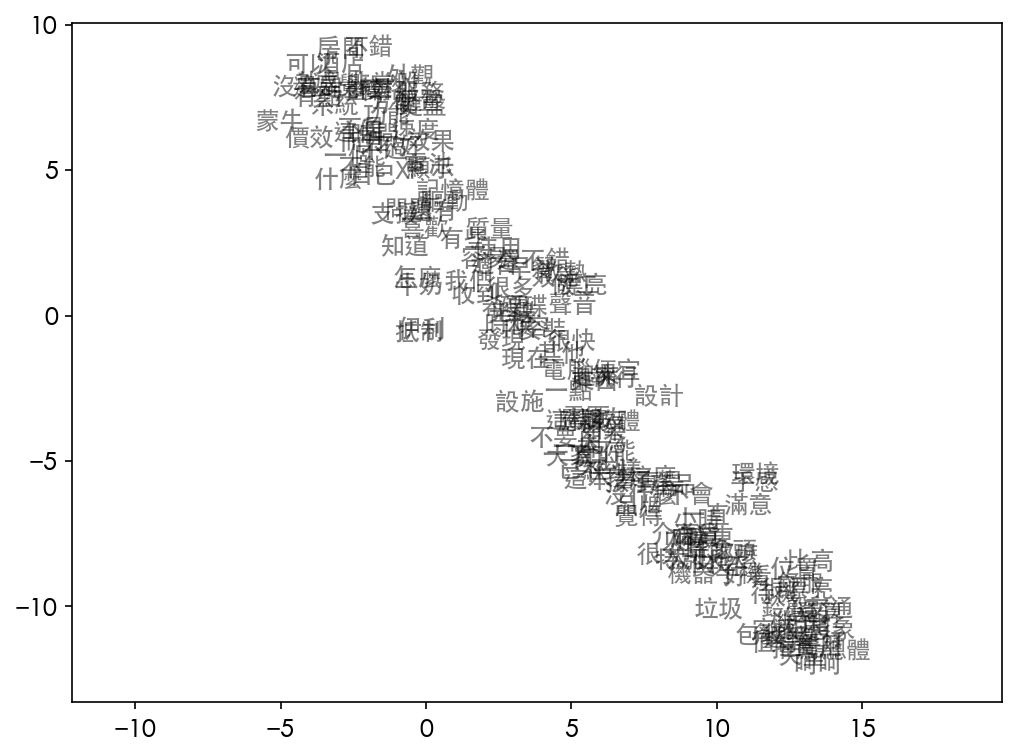

In [32]:
# fig = plt.gcf()
# fig.set_size_inches(24, 16)
plt.figure(figsize=(8, 6), dpi=150) 
# plt.figure(figsize=(8, 6), dpi=300) 
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = ['Heiti TC']
for i in range(len(points)):
    x = points[i][0]
    y = points[i][1]
    plt.scatter(x, y, alpha=0)
    plt.annotate(words[i], xy=(x, y), alpha=0.5)
plt.axis('equal')

## plot by bokeh
- https://stackoverflow.com/questions/40450943/adding-labels-to-a-bokeh-plot
- https://docs.bokeh.org/en/latest/docs/user_guide/annotations.html


In [36]:
import pandas as pd
import numpy as np
df = pd.DataFrame(points, columns = ['x', 'y'])
df['label'] = words
df

,x,y,label
0,-5.906383,6.432356,蒙牛
1,-2.846680,8.997695,不錯
2,-4.863205,8.396592,可以
3,-5.302427,7.637430,沒有
4,-3.798795,8.447018,酒店
...,...,...,...
145,6.160914,-5.994437,孩子
146,12.592457,-11.594624,實用
147,12.715446,-10.424174,還算
148,12.621670,-12.238034,呵呵


In [52]:
# !pip install bokeh
# !pip install jupyter_bokeh
from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [55]:
p = figure(title = "w2v")
p.circle(df["x"], df["y"], fill_alpha=0.2, size=10)
labels = LabelSet(x='x', y='y', text='label', 
                  x_offset=5, y_offset=5, 
                  source=ColumnDataSource(df), render_mode='canvas')
p.add_layout(labels)
show(p)